# **Final Project: What lies behind the success of the fastest long-distance runners in the world?**
- @author: Vania Alvarez Murakami
- @filename: ds2001-project.ipynb
- @date: November 25, 2020

**Code Outline:**

- Import Data
- Sort Data
- Nationality vs. Country of Birth
- Nationality vs. Country of Birth Visualized
- Statistics
    - Height
    - Weight
    - Age at competition
- Visualizing the Impact of Height, Weight and Age at Competition on Running Speed
- Analyzing Dates of Birth
    - Year of Birth (even vs odd)
    - Month 
- Results!


# **Import & Clean Data**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np
df = pd.read_csv("running_data.csv")

# Data cleaning; remove irrelevant columns for this project from data frame 
df = df.drop(columns=["place_of_comp", "place_of_birth"])

# **Sort Data**
- Sort data by rankings and store all the 1st places, all the top 3, and all the top 10
- Dates are in format dd/mm/yyy
- Metric system is used for all units of measurements
- Important Note: This project uses a proxy for the fastest runners in the world, as those being the top 10 fastest runners of the marathons from the compiled data; further dividing into the top 3 and top 1 runners.

In [2]:
# Data sorted in rankings from first place to last (data limited to only top 10 times)
df.sort_values(by=["ranking"], ascending=True)

# Runners that won the race
top_1 = df[df["ranking"] == 1]

# Runners that were in the top 3
top_3 = df[df["ranking"] <= 3]

# Runners that were in the top 10 
top_10 = df[df["ranking"] <= 10]


In [3]:
# Add a column that contains each runner's running pace 
time = df.time

def pace_in_mins(hr, mins, sec):
    run_time = float((hr * 60) + mins + (sec / 60))
    marathon_dist = 42.195     # This distance can be adjusted to any other distance if analyzing other competitions
    pace = run_time / marathon_dist
    
    return pace

for element in range(len(time)):
    hr,min,sec = time[element].split(":")
    pace = pace_in_mins(int(hr),int(min),int(sec))
    df.at[element,"pace_per_km"] = pace


# Nationality vs. Country of Birth
1. Is there a difference between the country of birth and nationality of a runner?
2. Which countries are the most prominent? Is there a particular country or world region that stands out (i.e. do the fastest runners in the world come from a particular region in the world?

In [4]:
""" Exploring the question: Is there a correlation between birthplace 
and likelihood to be better at running?

Comparison between a runner's nationality and country of birth;
many times, runners are from a particular birthplace but nationalized
to other countries which might skew the data when looking for particular
nationalities that are common for long-distance runners """

# Get the nationality in a dictionary where key = nationality, value = number of times that value was repeated

ndict = {}

for i in range(len(df)):
    nationality = df.loc[i, "nationality"]
    if nationality not in ndict:
        ndict[nationality] = 1
    else:
        ndict[nationality] += 1

# Total number of nationalities
n_nationalities = len(ndict)

# Get the country of birth key = country of birth, value = number of times that value was repeated

bdict = {}

for i in range(len(df)):
    country_of_birth = df.loc[i, "country_of_birth"]
    if country_of_birth not in bdict:
        bdict[country_of_birth] = 1
    else:
        bdict[country_of_birth] += 1
        
# Total number of nationalities
b_countries = len(bdict)


# Nationality vs. Country of Birth Visualized

In [5]:
# Frequency of nationalities
dfn = pd.DataFrame.from_dict(list(ndict.items()))
dfn.rename(columns = {0: "nationality", 1: "count"}, inplace=True)
dfn_sorted = dfn.sort_values("count", ascending=False)

""" RESULTS """

# dfn_sorted


' RESULTS '

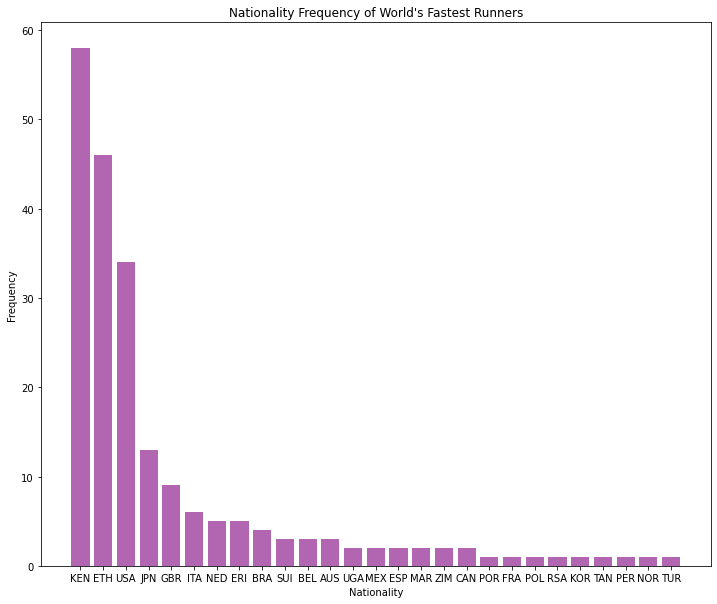

In [6]:
# Plot Bar Graph of Nationality Frequency
fig = plt.figure(figsize=(12,10))
plt.bar(dfn_sorted["nationality"], dfn_sorted["count"], alpha=0.6, color="purple")
plt.title("Nationality Frequency of World's Fastest Runners")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [7]:
# Frequency of Countries of Birth
dfb = pd.DataFrame.from_dict(list(bdict.items()))
dfb.rename(columns = {0: "country_of_birth", 1: "count"}, inplace=True)
dfb_sorted = dfb.sort_values("count", ascending=False)

""" RESULTS """

# dfb_sorted

' RESULTS '

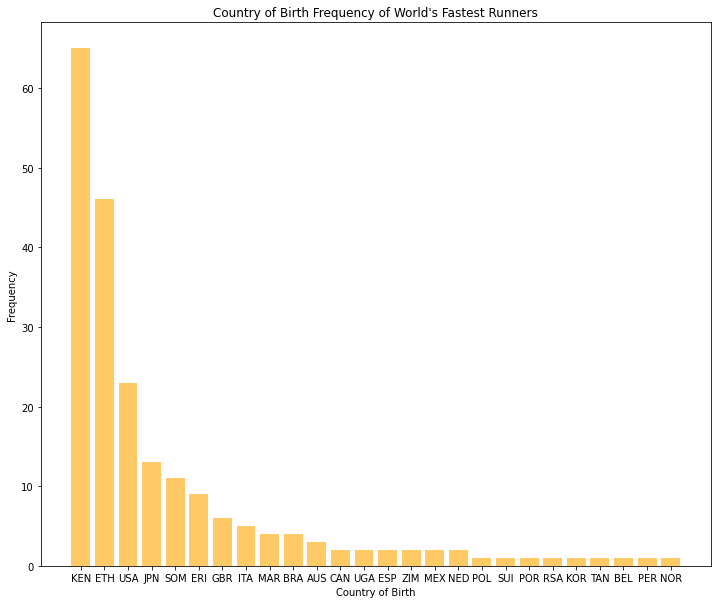

In [8]:
# Plot Bar Graph of Country of Birth Frequency
fig = plt.figure(figsize=(12,10))
plt.bar(dfb_sorted["country_of_birth"], dfb_sorted["count"], alpha=0.6, color="orange")
plt.title("Country of Birth Frequency of World's Fastest Runners")
plt.xlabel("Country of Birth")
plt.ylabel("Frequency")
plt.show()
plt.close()

Text(0, 0.5, 'Frequency')

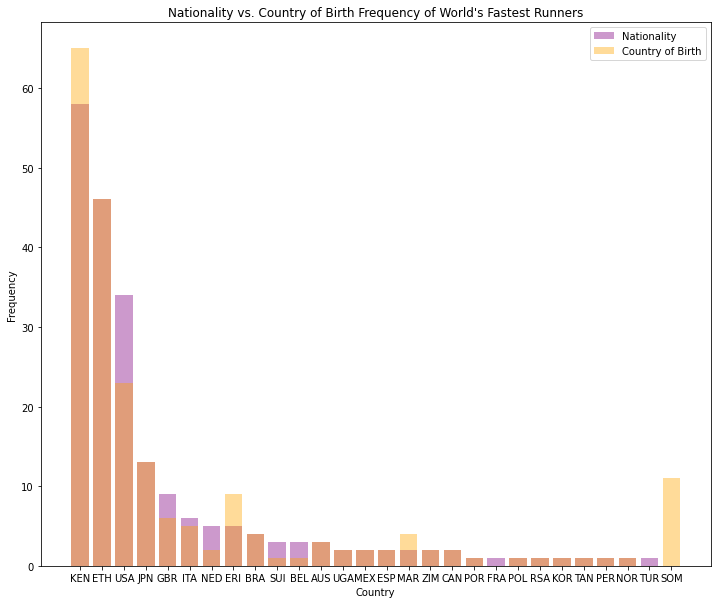

In [9]:
fig = plt.figure(figsize=(12,10))
plt.bar(dfn_sorted["nationality"], dfn_sorted["count"], alpha=0.4, color="purple")
plt.bar(dfb_sorted["country_of_birth"], dfb_sorted["count"], alpha=0.4, color="orange")
plt.legend(["Nationality","Country of Birth"])
plt.title("Nationality vs. Country of Birth Frequency of World's Fastest Runners")
plt.xlabel("Country")
plt.ylabel("Frequency")

# Statistics
- Metrics taken into account: height, weight, age of runners at competition
- Average of all first place runners
- Average of the top 3 runners
- Average of the top 10 runners

In [10]:
# Get the average height, weight and age for all first place competitors
top_1_mean = top_1.mean()
ave_top1height = top_1_mean["height_cm"]
ave_top1weight = top_1_mean["weight_kg"]
ave_top1age = top_1_mean["age_at_comp"]

# Get the average height, weight and age for the top three
top_3_mean = top_3.mean()
ave_top3height = top_3_mean["height_cm"]
ave_top3weight = top_3_mean["weight_kg"]
ave_top3age = top_3_mean["age_at_comp"]

# Get the average height, weight and age for the top ten
top_10_mean = top_10.mean(skipna = True)
ave_top10height = top_10_mean["height_cm"]
ave_top10weight = top_10_mean["weight_kg"]
ave_top10age = top_10_mean["age_at_comp"]


In [11]:
# Converting Data from Metric System to Imperial System

# Centimeters to Inches
def cm_to_inches(cm):
    inches =  cm / 2.54
    ft = inches / 12 
    return inches
    
# Kilograms to Pounds
def kg_lbs(kg):
    lbs = kg * 2.205
    return lbs 

# Visualizing the Impact of Height, Weight and Age at Competition on Running Speed

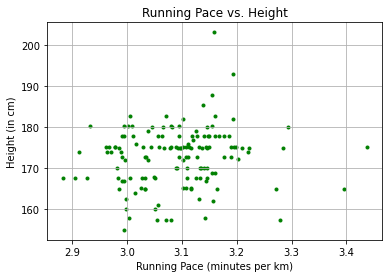

In [12]:
# Scatterplot of height vs running pace

height = df["height_cm"]
pace = df["pace_per_km"]

plt.scatter(pace, height, color="g", marker=".")
plt.xlabel("Running Pace (minutes per km)")
plt.ylabel("Height (in cm)")
plt.title("Running Pace vs. Height")
plt.grid()

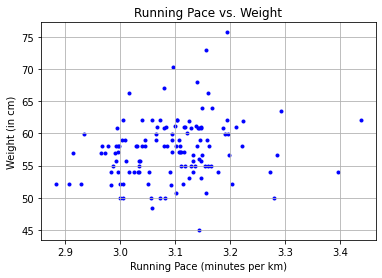

In [13]:
# Scatterplot of weight vs running pace

weight = df["weight_kg"]
pace = df["pace_per_km"]

plt.scatter(pace, weight, color="b", marker=".")
plt.grid
plt.xlabel("Running Pace (minutes per km)")
plt.ylabel("Weight (in cm)")
plt.title("Running Pace vs. Weight")
plt.grid()


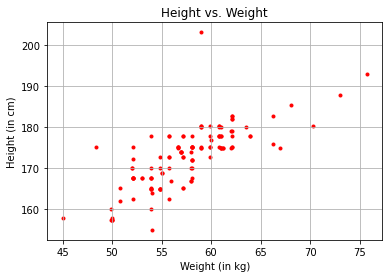

In [14]:
""" There's likely a correlation between height and weight i.e. the taller,
the heavier the runner will be. However, it is important to plot comparison,
to understand why Weight vs Pace and Height vs Pace graphs look so similar """
# Get comparison between height and weight 

height = df["height_cm"]
weight = df["weight_kg"]

plt.scatter(weight, height, color="r", marker=".")
plt.grid
plt.xlabel("Weight (in kg)")
plt.ylabel("Height (in cm)")
plt.title("Height vs. Weight")
plt.grid()

Text(0.5, 1.0, 'Running Pace vs. Age at Competition')

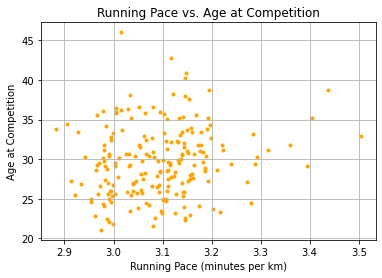

In [15]:
# Scatterplot of age at competition vs running pace

age_at_comp = df["age_at_comp"]
pace = df["pace_per_km"]

plt.scatter(pace, age_at_comp, color="orange", marker=".")
plt.grid()
plt.xlabel("Running Pace (minutes per km)")
plt.ylabel("Age at Competition")
plt.title("Running Pace vs. Age at Competition")

# Visualizing the Statiscal Differences Between Ranking Subgroups for Height, Weight, and Age

Text(0.5, 1.0, 'Average Height per Subgroup')

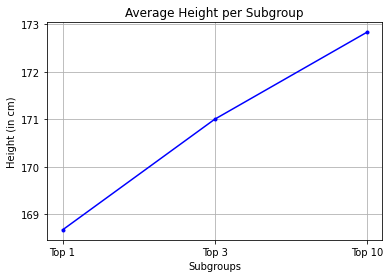

In [16]:
# Plotting Average Height for Each Subgroup
subgroups = ['Top 1', 'Top 3', 'Top 10']
values = [ave_top1height, ave_top3height, ave_top10height]

plt.plot(subgroups, values, color="b", marker=".")
plt.grid()
plt.xlabel("Subgroups")
plt.ylabel("Height (in cm)")
plt.title("Average Height per Subgroup")

Text(0.5, 1.0, 'Average Weight per Subgroup')

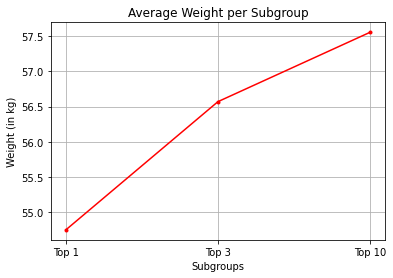

In [17]:
# Plotting Average Weight for Each Subgroup
subgroups = ['Top 1', 'Top 3', 'Top 10']
values = [ave_top1weight, ave_top3weight, ave_top10weight]

plt.plot(subgroups, values, color="r", marker=".")
plt.grid()
plt.xlabel("Subgroups")
plt.ylabel("Weight (in kg)")
plt.title("Average Weight per Subgroup")

Text(0.5, 1.0, 'Average Age per Subgroup')

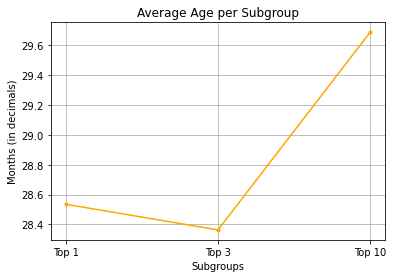

In [18]:
# Plotting Average Age for Each Subgroup
subgroups = ['Top 1', 'Top 3', 'Top 10']
values = [ave_top1age, ave_top3age, ave_top10age]

plt.plot(subgroups, values, color="orange", marker=".")
plt.grid()
plt.xlabel("Subgroups")
plt.ylabel("Months (in decimals)")
plt.title("Average Age per Subgroup")

# Analyzing Dates of Birth
- Does birthdate play a role in runners's success?
- Specifically, month of birth and/or date of birth

In [19]:
""" Percentage of runners that where born
in a year that is even vs odd
"""

# Create a dictionary of the month, and the frequency

date_of_birth = df["date_of_birth"].dropna()

even_years = []
odd_years = []

# Get year
for element in date_of_birth:
    aux_array = element.split("/")
    year = int(aux_array[2])
    
    if year%2 == 0:
        even_years.append(year)
    else:
        odd_years.append(year)

# Getting data in percentages
perc_even = (len(even_years) / len(date_of_birth)) * 100
perc_odd = (len(odd_years) / len(date_of_birth)) * 100


In [20]:
""" Get the month of birth of all runners, observe if 
there is any more/less frequent months of birth
"""

# Get month from data frame
# Initialize empty dictionary

mdict = {}
        
# Counter for month frequency

for i in range(len(df)):
    date = df.loc[i, "date_of_birth"]
    if type(date) == str:
        month = date.split('/')
        month = int(month[1])
        if month not in mdict:
            mdict[month] = 1
        else:
            mdict[month] += 1

""" Compile dictionary with month and frequency
of runners born in each month """

# Initialize empty dictionary
new_mdict = {}

# Rearrange dictionary, replace month number for name

for key in mdict.keys():
    if key == 1:
        new_mdict["JAN"] = mdict[key]
    elif key == 2:
        new_mdict["FEB"] = mdict[key]
    elif key == 3:
        new_mdict["MAR"] = mdict[key]
    elif key == 4:
        new_mdict["APR"] = mdict[key]
    elif key == 5:
        new_mdict["MAY"] = mdict[key]
    elif key == 6:
        new_mdict["JUN"] = mdict[key]
    elif key == 7:
        new_mdict["JUL"] = mdict[key]
    elif key == 8:
        new_mdict["AUG"] = mdict[key]
    elif key == 9:
        new_mdict["SEP"] = mdict[key]
    elif key == 10:
        new_mdict["OCT"] = mdict[key]
    elif key == 11:
        new_mdict["NOV"] = mdict[key]
    elif key == 12:
        new_mdict["DEC"] = mdict[key]

In [21]:
# Visualize compiled data in data frame
df1 = pd.DataFrame.from_dict(list(new_mdict.items()))
df1.rename(columns = {0: "month", 1: "count"}, inplace=True)
df1_sorted = df1.sort_values("count", ascending=False)

""" RESULTS """
# df1_sorted

' RESULTS '

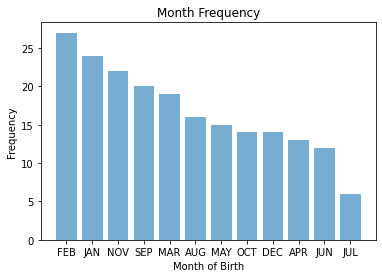

In [22]:
# Graphing the frequency of birth month of top runners

plt.bar(df1_sorted["month"], df1_sorted["count"], alpha=0.6)
plt.title("Month Frequency")
plt.xlabel("Month of Birth")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [23]:
""" RESULTS:
Run this cell to print summary report of the results!
"""

print("REPORT:", "\n")

# Frequency of Nationalities & Total Number of Nationalities
# Note: This data is also stored in data frame: "dfn_sorted" 

print("NATIONALITY VS COUNTRY OF BIRTH", "\n")
# Nationality
print("Frequency of Top Runner Nationalities:", "\n", ndict, "\n")
# Country of Birth
print("Total Number of Nationalities:", n_nationalities, "\n"
     "Runners in 'Nationalities' Data Set:", len(df["nationality"]), "\n")


# Frequency of Countries of Birth & Total Number of Countries
# Note: This data is also stored in data frame: "dfb_sorted" 
print("Frequency of Top Runner Countries of Birth:", "\n", bdict, "\n")
print("Total Number of Countries of Birth:", b_countries, "\n"
      "Runners in 'Nationalities' Data Set:", len(df["country_of_birth"]), "\n\n\n") 



print("STATISTICS FOR TOP 1, TOP 3 AND TOP 10 RUNNERS", "\n")
# First Place Runners
print("1st Place Runners Statistics", "\n"
      "Average Height of 1st Place Runners:", round(ave_top1height, 2), "cm", "(or", round(cm_to_inches(ave_top1height), 2), "in)", "\n"
      "Average Weight of 1st Place Runners:", round(ave_top1weight,2), "kg", "(or", round(kg_lbs(ave_top1weight), 2), "lbs)", "\n"
      "Average Age of 1st Place Runners:", round(ave_top1age,2), "\n")

# Top Three Fastest Runners
print("Top 3 Runners Statistics", "\n"
      "Average Height of Top 3 Runners:", round(ave_top3height,2), "cm", "(or", round(cm_to_inches(ave_top3height), 2), "in)", "\n"
      "Average Weight of Top 3 Runners:", round(ave_top3weight,2), "kg", "(or", round(kg_lbs(ave_top3weight), 2), "lbs)", "\n"
      "Average Age of Top 3 Runners:", round(ave_top3age,2), "\n")

# Top Ten Fastest Runners
print("Top 10 Runners Statistics", "\n"
      "Average Height of Top 10 Runners:", round(ave_top10height,2), "cm", "(or", round(cm_to_inches(ave_top10height), 2), "in)", "\n"
      "Average Weight of Top 10 Runners:", round(ave_top10weight,2), "kg", "(or", round(kg_lbs(ave_top10weight), 2), "lbs)", "\n"
      "Average Age of Top 10 Runners:", round(ave_top10age,2), "\n\n\n")



print("EVEN VS ODD BIRTH YEARS", "\n")
# Even vs Odd Birth Years
print("Total Runners With Birth Dates:", len(even_years) + len(odd_years), "\n")
print("Total Runners Born in Even Years:", len(even_years))
print("Percentage of Runners Born in Even Years:", round(perc_even, 2),"%", "\n")

print("Total Runners Born in Odd Years:", len(odd_years))
print("Percentage of Runners Born in Even Years:", round(perc_odd, 2), "%", "\n")

print("BIRTH MONTH FREQUENCY OF TOP RUNNERS", "\n")
print(df1_sorted)

REPORT: 

NATIONALITY VS COUNTRY OF BIRTH 

Frequency of Top Runner Nationalities: 
 {'KEN': 58, 'ETH': 46, 'USA': 34, 'ERI': 5, 'TAN': 1, 'SUI': 3, 'UGA': 2, 'GBR': 9, 'CAN': 2, 'BRA': 4, 'JPN': 13, 'ZIM': 2, 'POL': 1, 'ITA': 6, 'MAR': 2, 'POR': 1, 'ESP': 2, 'FRA': 1, 'AUS': 3, 'RSA': 1, 'KOR': 1, 'MEX': 2, 'NED': 5, 'BEL': 3, 'PER': 1, 'NOR': 1, 'TUR': 1} 

Total Number of Nationalities: 27 
Runners in 'Nationalities' Data Set: 210 

Frequency of Top Runner Countries of Birth: 
 {'KEN': 65, 'ETH': 46, 'USA': 23, 'ERI': 9, 'TAN': 1, 'UGA': 2, 'GBR': 6, 'CAN': 2, 'BRA': 4, 'JPN': 13, 'ZIM': 2, 'POL': 1, 'ITA': 5, 'MAR': 4, 'SUI': 1, 'POR': 1, 'ESP': 2, 'AUS': 3, 'RSA': 1, 'KOR': 1, 'MEX': 2, 'SOM': 11, 'NED': 2, 'BEL': 1, 'PER': 1, 'NOR': 1} 

Total Number of Countries of Birth: 26 
Runners in 'Nationalities' Data Set: 210 



STATISTICS FOR TOP 1, TOP 3 AND TOP 10 RUNNERS 

1st Place Runners Statistics 
Average Height of 1st Place Runners: 168.67 cm (or 66.41 in) 
Average Weight of 1s